In [1]:
import matplotlib.pyplot as plt
from torch import load
import numpy as np

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = load('../models/comb_conv_32.pt')
model.eval()

BaryonModel(
  (linear_in): Linear(in_features=141, out_features=141, bias=False)
  (features_1): Conv1d(1, 1, kernel_size=(141,), stride=(1,), padding=(140,), bias=False)
  (linear_1): Linear(in_features=281, out_features=32, bias=False)
  (linear_2): Linear(in_features=32, out_features=141, bias=False)
  (relu): ReLU()
  (leaky): LeakyReLU(negative_slope=0.01)
  (sigmoid): Sigmoid()
)

In [3]:
from hydroml.libs.dataset import Dataset
from torch.utils.data import DataLoader

net_Baryons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)

net_Protons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

dataset_19 = Dataset(net_Baryons_19, net_Protons_19, 141)

dataset = dataset_19

data_loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True,
)

5000
Event ID 100


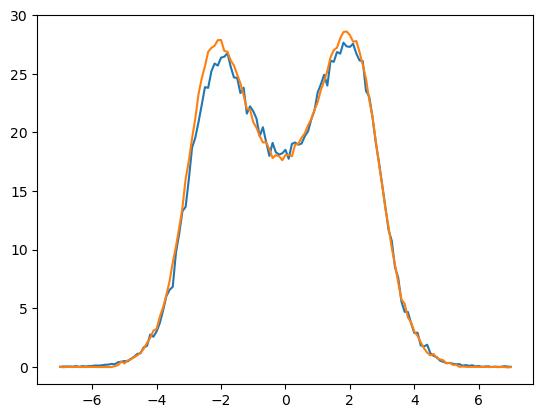

Event ID 200


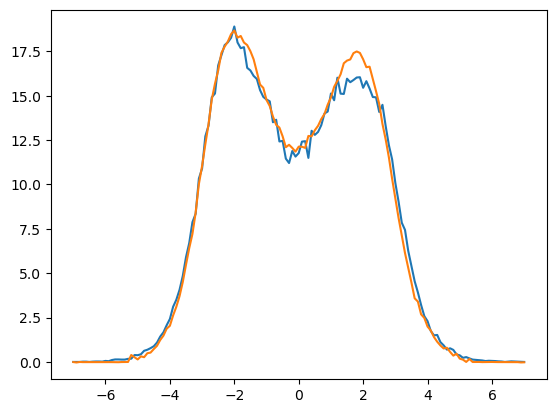

Event ID 500


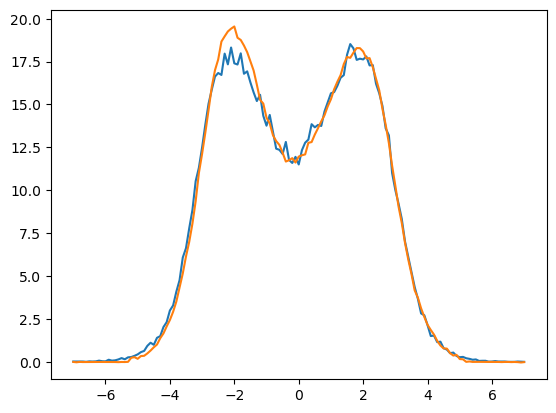

Event ID 800


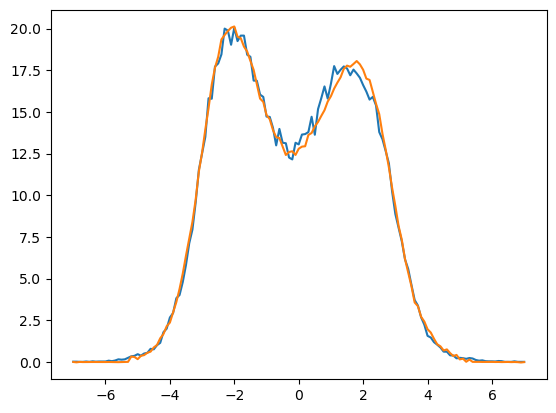

Event ID 1200


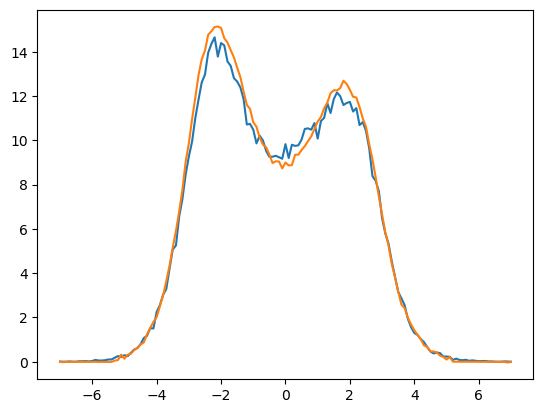

Event ID 1500


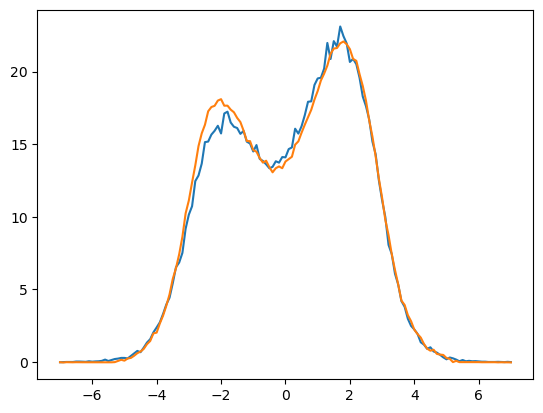

Event ID 1600


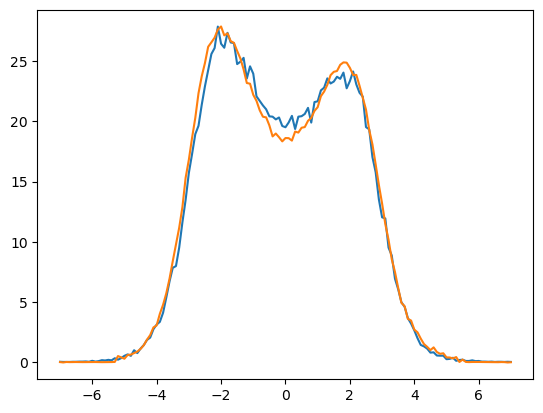

Event ID 1700


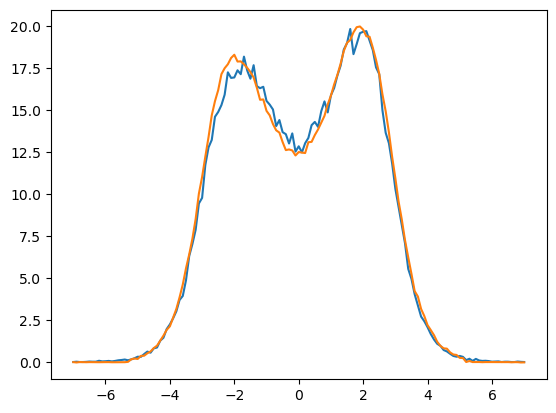

Event ID 1900


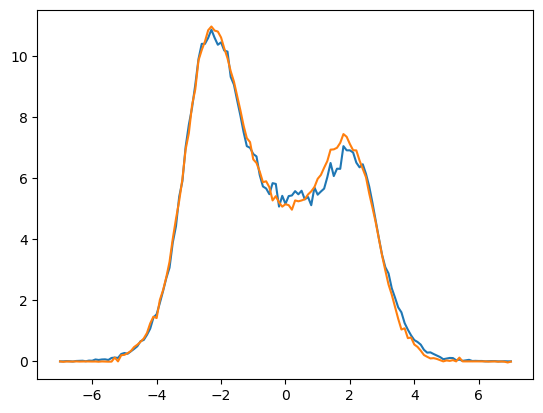

Event ID 2200


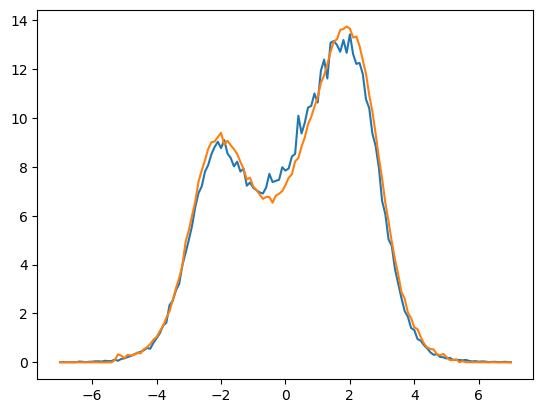

Event ID 2700


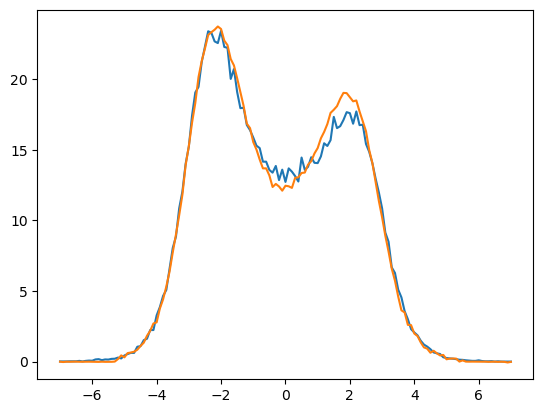

Event ID 2800


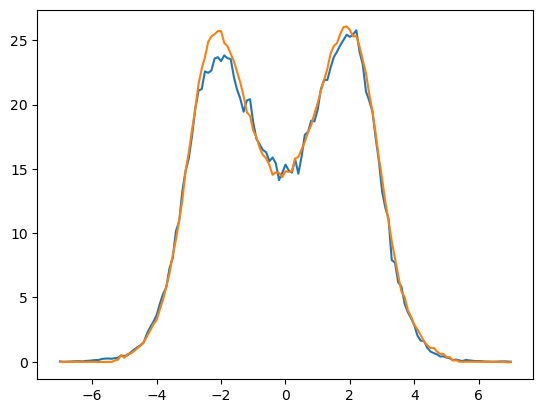

Event ID 3100


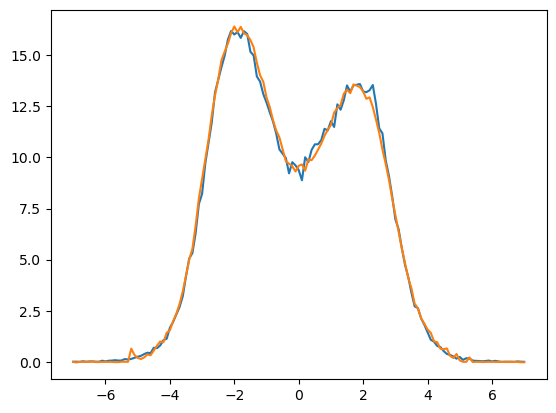

Event ID 3300


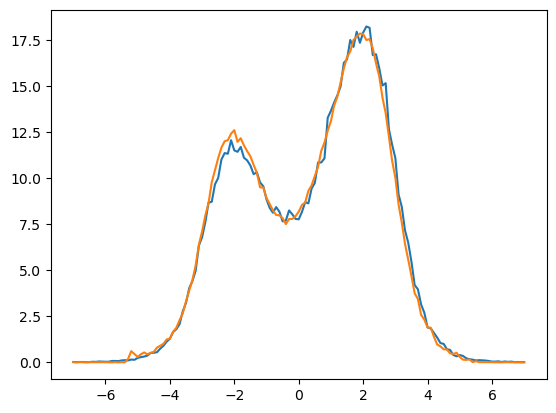

Event ID 3800


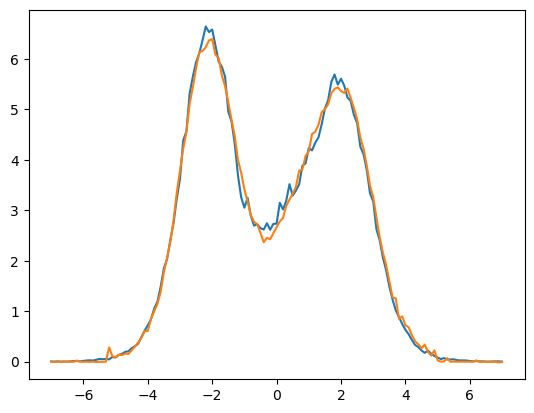

Event ID 3900


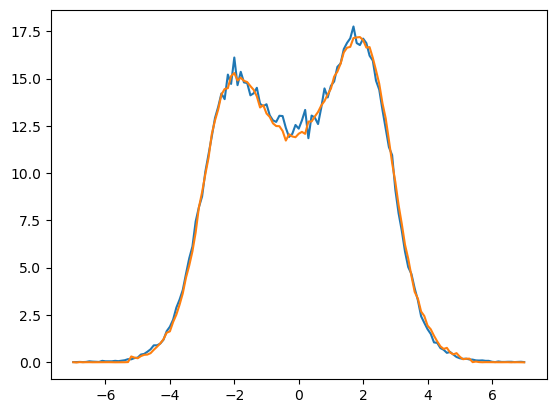

Event ID 4200


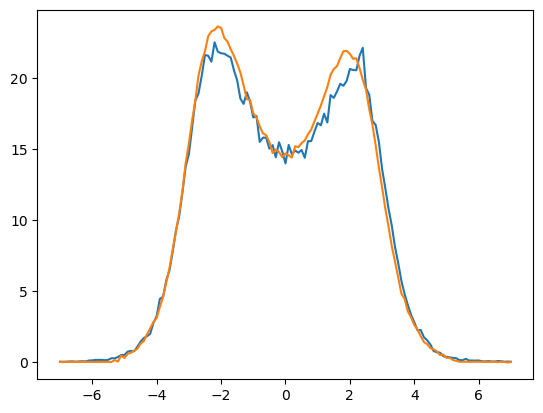

Event ID 4300


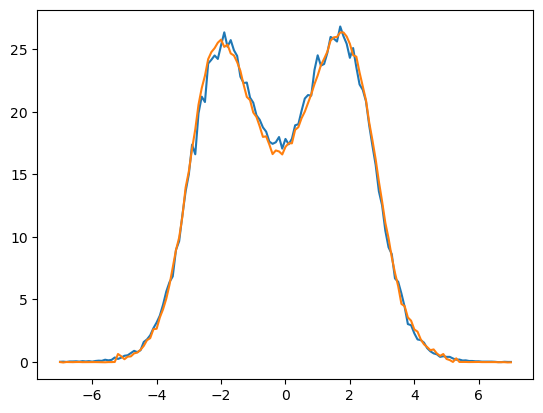

Event ID 4500


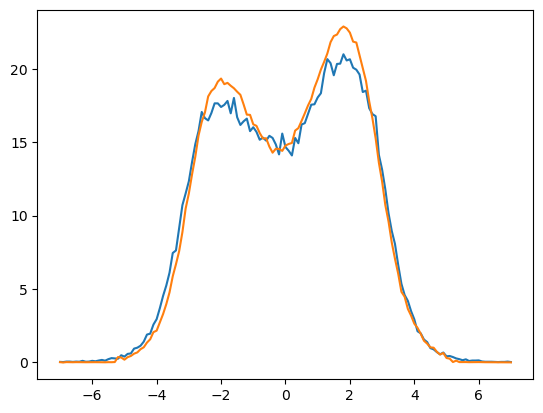

Event ID 4700


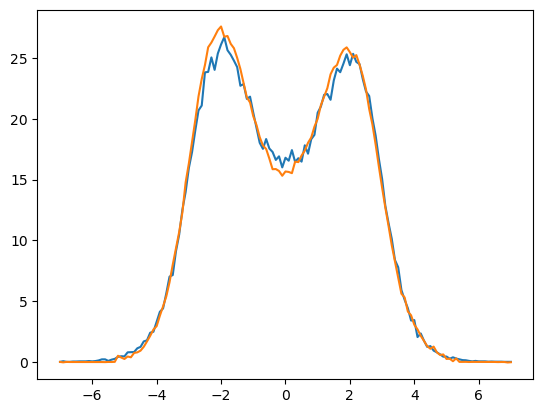

Event ID 4800


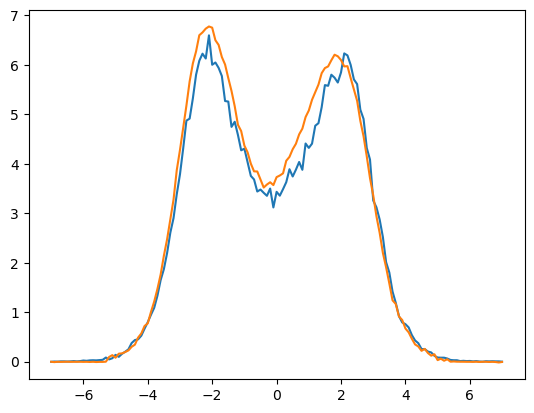

Values for actual final state
Mean: 9.862860679626465
Standard Diviation: 11.34959888458252
Variance: 128.81339216978031 
Variance Error: 2.8341040505890653
Skew: 1.2174366182760794
Skew Error: 2.276182365772652
Kurtosis: 3.420357544017596
Kurtosis Error: 19.548786446874942

Values for model output final state
Mean: 9.743744850158691
Standard Diviation: 11.146241188049316
Variance: 124.23870797587468 
Variance Error: 2.7122732952951707
Skew: 1.2074209890533172
Skew Error: 2.1856776033506358
Kurtosis: 3.3829953785560876
Kurtosis Error: 18.42763455678466


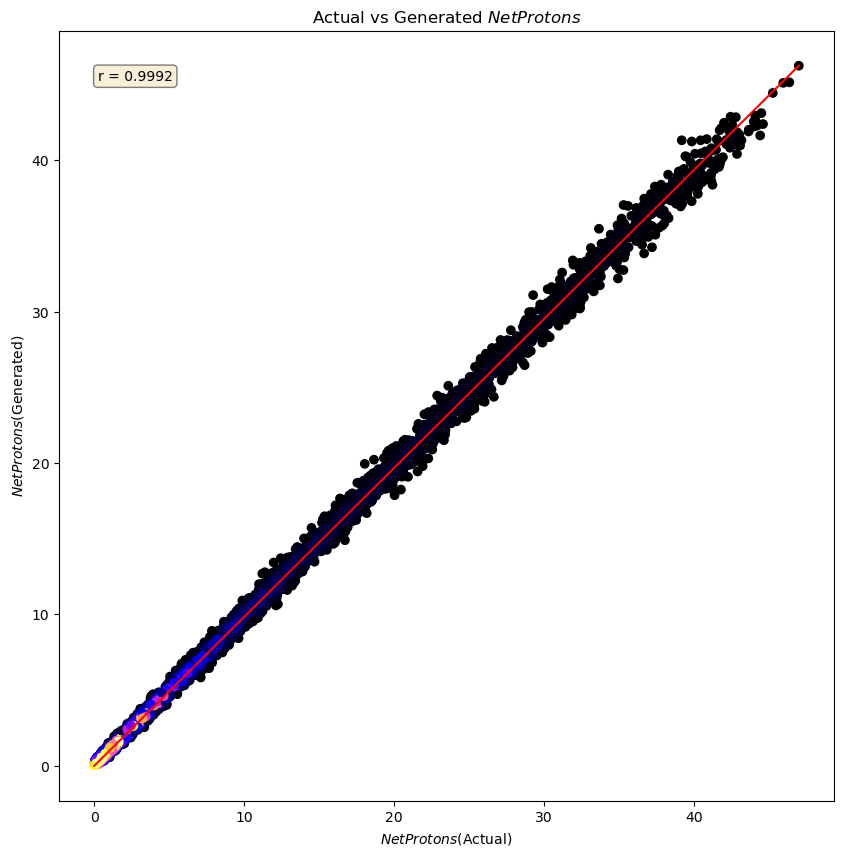

In [4]:
from hydroml.libs.plot import plot_cc_graph, plot_output
from hydroml.libs.moments import Moments
from hydroml.utils.trim import trim

finals = []
models = []
bound_1 = -1
bound_2 = 1

import numpy as np

print(len(data_loader))

for i, data in enumerate(data_loader):
    key = data[0]
    value = data[1].flatten()

    protons_model = model(key)

    protons_model = protons_model.detach().numpy().flatten()

    eta_trim, protons_trim = trim( dataset.eta, value, bound_1, bound_2  )
    _, protons_model_trim = trim( dataset.eta, protons_model, bound_1, bound_2  )

    finals.append( np.trapz( protons_trim, x=eta_trim ) )
    models.append( np.trapz( protons_model_trim, x=eta_trim ) )

    if i%100 == 0 and value.max() > 5.0:
        print(f'Event ID {i}')
        plt.plot(dataset.eta, value)
        plt.plot(dataset.eta, protons_model)
        plt.show()

finals_moments = Moments(finals)
models_moments = Moments(models)

print("Values for actual final state")
print(finals_moments)

print()

print("Values for model output final state")
print(models_moments)

plot_cc_graph(np.array(finals), np.array(models), "Net Protons")